# Product of a matrix and a vector

Let $\mathbf{A}$ be a $N \times M$ matrix and $\mathbf{x}$ be a $M \times 1$ vector. $\mathbf{A}$ can be represented by using a *row partition* or by a *colunm partition* as follows:

$$\begin{split}
    \mathbf{A} 
    & = \left[
    \begin{array}{ccc}
        a_{11} & \cdots & a_{1M} \\
        \vdots &        & \vdots \\
        a_{N1} & \cdots & a_{NM}
    \end{array}
    \right]_{N \times M} \\
    & = \left[
    \begin{array}{c}
        \mathbf{A}[1,:] \\
        \vdots \\
        \mathbf{A}[N,:]
    \end{array}
    \right]_{N \times M} \\
    & = \left[
    \begin{array}{ccc}
        \mathbf{A}[:,1] &
        \cdots &
        \mathbf{A}[:,M]
    \end{array}
    \right]_{N \times M}
\end{split} \: ,$$

where $\mathbf{A}[i,:]$, $i = 1, ..., N$, is a $1 \times M$ vector representing the $i$th row of $\mathbf{A}[i,:]$ and $\mathbf{A}[:,j]$, $j = 1, ..., M$, is a $N \times 1$ vector representing the $j$th colunm of $\mathbf{A}$.

Once defined these partitions, we can define the product $\mathbf{y} = \mathbf{A} \mathbf{x}$ by using a *doubly nested for*

    for i = 1:N
        y[i] = 0
        for j = 1:M
            y[i] = y[i] + A[i,j]*x[j]

or by using a *dot product formulation*

    for i = 1:N
        y[i] = dot(A[i,:], x[:])

or by using a *linear combination formulation*

    y[:] = 0
    for j = 1:M
        y[:] = y[:] + A[:,j]*x[j]

### Exercise 5

Show that these three approaches are equivalent. To do this, follow the steps below:

1. Create a function that implements the first approach and save it in an external file
2. Create a function that implements the second approach and save it in an external file
3. Create a function that implements the third approach and save it in an external file
3. Use the `code-template.ipynb` for testing the three functions against the python code shown below

#### Numpy example of the matrix-vector product

Import numpy

In [1]:
import numpy as np

Create a colunm vector `x` by using the function [numpy.arange](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) and a row vector `zT` by using the function [numpy.reshape](http://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)

In [2]:
x = np.arange(5.)
x = np.reshape(x, (x.size, 1))

In [3]:
x

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.]])

Create a matrix `A` by using the function [numpy.arange](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) and [numpy.reshape](http://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)

In [4]:
A = np.reshape(np.arange(20.), (4,5))

In [5]:
A

array([[  0.,   1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  13.,  14.],
       [ 15.,  16.,  17.,  18.,  19.]])

Calculate the matrix-vector product by using the function [numpy.dot](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html):

In [6]:
np.dot(A,x)

array([[  30.],
       [  80.],
       [ 130.],
       [ 180.]])

What happens if the function `numpy.dot` is used to compute the product of the matrix `A` and a vector `y = np.arange(5.)`?

### Exercise 6

The previously presented algorithm for calculating a simple moving average filter (`first_steps_Python\SMA\sma.ipynb`) can be formulated as the product of a matrix $\mathbf{A}$ and the original data $\mathbf{x}$, where $\mathbf{A}$ depends on the number of points forming the moving window and the number of data. For example, consider a data vector $\mathbf{x}$ given by

$$
\mathbf{x} = \left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \\
x_{5}
\end{array} \right]
$$

and a moving window formed with size $3$. In this case, the matrix $\mathbf{A}$ is given by

$$
\mathbf{A} = \frac{1}{3} \, \left[ \begin{array}{ccccc}
0 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 & 1 \\
0 & 0 & 0 & 0 & 0
\end{array} \right] \: .
$$

#### Hint: how to create $\mathbf{A}$ automatically?

In [7]:
N = 5 # number of data
ws = 3 # window size
i0 = ws//2
A = np.array(np.hstack(((1./ws)*np.ones(ws), np.zeros(N - ws + 1))))
#A = np.array(np.hstack((np.array([-1.,0.,1.]), np.zeros(N - ws + 1))))

In [8]:
A = np.resize(A, (N-2*i0, N))

In [9]:
A = np.vstack((np.zeros(N), A, np.zeros(N)))

In [10]:
A

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.33333333,  0.33333333,  0.33333333,  0.        ,  0.        ],
       [ 0.        ,  0.33333333,  0.33333333,  0.33333333,  0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.33333333,  0.33333333],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

Then, the filtered data $\mathbf{x}_{f}$ can be calculated as follows:

$$\mathbf{x}_{f} = \mathbf{A} \, \mathbf{x} \: .$$

Show that this formulation is equivalent to the previously presented one. To do that,

1. Create a function that calculates the moving average filter by using the matrix-vector product. This function must receive two arguments: the data vector and the number of points forming the moving window. This function must create the matrix $\mathbf{A}$ and call one of the three functions created in the previous exercise for calculating the matrix-vector product.
2. Use the `code-template.ipynb` to compare the results produced by the function created in the previous step with the results produced by the function created in the previous class for calculating the moving average filter.

### Exercise 7

Let $\mathbf{y}$ be a $N \times 1$ vector whose $i$th element $y_{i} = f(x_{i})$, $i = 1, ..., N$, represents a function $f(x)$ evaluated at a point $x_{i}$. Let us also consider that the $N$ points $x_{i}$ are regularly spaced, it means

$$
x_{i} = x_{1} + (i-1)*h \: , \quad i = 1, ..., N \: ,
$$

where $x_{1}$ is the minimum $x_{i}$.

In this case, the derivative of the function $f(x)$ with respect to $x$ can be approximated by using a [central finite difference](https://en.wikipedia.org/wiki/Finite_difference) equation:

$$
\frac{d \, f(x_{i})}{d \, x} \approx \frac{f(x_{i} + h) - f(x_{i} - h)}{2 \, h} \: , \quad i = 2, ..., N-1 \: ,
$$

where $y_{i+1} = f(x_{i} + h)$ and $y_{i-1} = f(x_{i} - h)$. Notice that the derivative $\frac{d \, f(x_{i})}{d \, x}$ is not calculated at the points $x_{1}$ and $x_{N-1}$. The first derivatives $\frac{d \, f(x_{i})}{d \, x}$ can be calculated as a matrix-vector product $\mathbf{A} \, \mathbf{y}$, where

$$
\mathbf{A} = \frac{1}{2 \, h} \, \left[ \begin{array}{c}
0 & 0 & 0 & 0 & \cdots & 0 \\
-1 & 0 & 1 & 0 & \cdots & 0 \\
0 & -1 & 0 & 1 & & 0 \\
\vdots  & & &  &  & \vdots \\
0  &  & -1 & 0 & 1 & 0 \\
0  & \cdots & 0 & -1 & 0 & 1 \\
0 & \cdots & 0 & 0 & 0 & 0
\end{array} \right] \: .
$$

Based on this introduction,

1. Create a function that receives a $N \times 1$ data vector $\mathbf{y}$ and return the first derivatives calculated according to the matrix-vector product presented above. The function must call one the functions created in the Exercise 5 for calculating the matrix-vector product.
2. Use the `code-template.ipynb` to test this function. Create a vector `theta` with the function [numpy.arange](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), by using the arguments `0.`, `2*np.pi`, `dtheta`, where `dtheta = 2.*np.pi/1000`. Create a data vector `y` by using the [numpy.sin](http://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html) function.
3. Calculate a vector `z_true` by using the [numpy.cos](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cos.html) function.
4. Calculate a `z_calc` vector with our function and compare with the `z_true` vector by using the [numpy.allclose](http://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html) function. Remember that the first and last elements of `z_calc` will be equal to zero. This fact must be taken into account in the test.

In [11]:
dtheta = 2.*np.pi/1000
theta = np.arange(0., 2*np.pi, dtheta)

In [12]:
y = np.sin(theta)

In [13]:
N = y.size # number of data
ws = 3
i0 = ws//2
#A = np.array(np.hstack(((1./ws)*np.ones(ws), np.zeros(N - ws + 1))))
A = np.array(np.hstack((np.array([-1.,0.,1.]), np.zeros(N - ws + 1))))

In [14]:
A = np.resize(A, (N-2*i0, N))

In [15]:
A = np.vstack((np.zeros(N), A, np.zeros(N)))

In [16]:
A.shape

(1000L, 1000L)

In [17]:
y_filt = (1./(2.*dtheta))*np.dot(A,y)

In [18]:
z = np.cos(theta)

In [19]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt

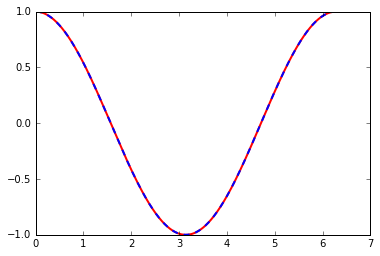

In [21]:
plt.plot(theta[1:N-1], z[1:N-1], 'r-', linewidth=2)
plt.plot(theta[1:N-1], y_filt[1:N-1], 'b--', linewidth=2)
plt.show()